# Random Forest Classifier and Other Alg Model Building

Data Collection: https://archive.ics.uci.edu/ml/datasets/census+income

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database.

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

>50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datasets/adult_census_data.xlsx")

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Data Cleaning

In [ ]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
numerical_featues = [col for col in data.columns if data[col].dtype != 'O']

In [ ]:
for cat in categorical_features:
    print('----------------------------')
    print(cat)
    print('----------------------------')
    total = data[cat].value_counts()
    percentage = data[cat].value_counts(normalize=True)
    result = pd.concat([total,percentage],keys=['Total','Percentage'],axis=1)
    print(result)

    
    print('\n')

----------------------------
workclass
----------------------------
                  Total  Percentage
Private           22696    0.697030
Self-emp-not-inc   2541    0.078038
Local-gov          2093    0.064279
?                  1836    0.056386
State-gov          1298    0.039864
Self-emp-inc       1116    0.034274
Federal-gov         960    0.029483
Without-pay          14    0.000430
Never-worked          7    0.000215


----------------------------
education
----------------------------
              Total  Percentage
HS-grad       10501    0.322502
Some-college   7291    0.223918
Bachelors      5355    0.164461
Masters        1723    0.052916
Assoc-voc      1382    0.042443
11th           1175    0.036086
Assoc-acdm     1067    0.032769
10th            933    0.028654
7th-8th         646    0.019840
Prof-school     576    0.017690
9th             514    0.015786
12th            433    0.013298
Doctorate       413    0.012684
5th-6th         333    0.010227
1st-4th         168   

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [ ]:
unclean_col = ['workclass', 'occupation', 'native-country']
for col in unclean_col:
    print(f"? in {col} : {data[col].isin(['?']).sum()}")

? in workclass : 1836
? in occupation : 1843
? in native-country : 583


In [ ]:
unclean_col = ['workclass', 'occupation', 'native-country']
for col in unclean_col:
    data[col].replace('?', np.nan, inplace=True)

In [ ]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

### Applying SimpleImputer to update missing value with most frequent

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_most = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in unclean_col:
  imp_most.fit_transform(data[i].values.reshape(-1,1))

### Checking Duplicates

In [ ]:
data.duplicated().sum()

24

In [ ]:
data.drop_duplicates(keep='first', inplace = True)

In [ ]:
data.reset_index()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


### Encoding Target variable with 0 and 1

In [ ]:
data['class'].value_counts()

<=50K    24698
>50K      7839
Name: class, dtype: int64

In [ ]:
data['class'] = data['class'].map({'<=50K' : 0, '>50K' : 1})

In [ ]:
data['class'] = data['class'].astype('int')

In [ ]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
numerical_featues = [col for col in data.columns if data[col].dtype != 'O']

In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class              int64
dtype: object

### Apply Onehot encoding

In [ ]:
data = pd.get_dummies(data=data, columns=categorical_features, drop_first=False)

In [ ]:
data.shape

(32537, 106)

In [ ]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop('class',axis=1)
y = data['class']

In [ ]:
X.shape, y.shape

((32537, 105), (32537,))

In [ ]:
y.value_counts()

0    24698
1     7839
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1,stratify=y)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21799, 105), (21799,), (10738, 105), (10738,))

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train,y_train)

0.9999541263360705

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7125, 1026],
       [ 977, 1610]])

In [ ]:
dt.score(X_test,y_test)

0.813466194822127

### Train Data is Over fitting. Lets prun the tree and will go some hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'criterion' : ["entropy", "gini"],
             'splitter' : ['best', 'random'],
             'max_depth' : [7,8,9,10],
             'min_samples_split' : [5,10],
             'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
classifercv = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5,n_jobs=-1)
classifercv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
classifercv.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
Decision_with_bestparams = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, max_features= 'sqrt', min_samples_split= 5,
splitter= 'best')

In [ ]:
Decision_with_bestparams.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_split=5)

In [ ]:
Decision_with_bestparams.score(X_train,y_train)

0.8448093949263727

In [ ]:
Decision_with_bestparams.score(X_test,y_test)

0.8466194822127026

In [ ]:
y_pred_best = Decision_with_bestparams.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_best)

array([[7887,  264],
       [1383, 1204]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',n_jobs=-1,oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)

In [ ]:
rf.score(X_train,y_train)

0.9999541263360705

In [ ]:
rf.score(X_test,y_test)

0.8546284224250326

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

In [ ]:
bgc = BaggingClassifier(base_estimator=SVC(), n_estimators=10,n_jobs=-1,bootstrap=True)
bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_jobs=-1)

In [ ]:
bgc.score(X_train,y_train)

0.7917794394238268

In [ ]:
bgc.score(X_test,y_test)

0.7946544980443285

## ExtraTree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc = ExtraTreesClassifier(n_estimators=50, criterion= 'entropy', max_depth= 9, max_features= 'sqrt', min_samples_split= 5
                           , bootstrap=True)
etc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=9,
                     max_features='sqrt', min_samples_split=5, n_estimators=50)

In [ ]:
etc.score(X_train,y_train)

0.8357722831322538

In [ ]:
etc.score(X_test,y_test)

0.8302290929409574

## Voting Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

[0 0 0 ... 0 0 1]


In [ ]:
eclf1.score(X_train,y_train)

0.8087526950777558

In [ ]:
eclf1.score(X_test,y_test)

0.8129074315514994

## Tree visualization

[Text(0.7176529255319148, 0.95, 'X[3] <= 5095.5\ngini = 0.366\nsamples = 21799\nvalue = [16547, 5252]'),
 Text(0.526529255319149, 0.85, 'X[24] <= 0.5\ngini = 0.327\nsamples = 20765\nvalue = [16489, 4276]'),
 Text(0.3605053191489362, 0.75, 'X[46] <= 0.5\ngini = 0.321\nsamples = 20545\nvalue = [16421, 4124]'),
 Text(0.20106382978723406, 0.65, 'X[40] <= 0.5\ngini = 0.295\nsamples = 18221\nvalue = [14949, 3272]'),
 Text(0.1127659574468085, 0.55, 'X[62] <= 0.5\ngini = 0.244\nsamples = 15794\nvalue = [13546, 2248]'),
 Text(0.06489361702127659, 0.45, 'X[34] <= 0.5\ngini = 0.306\nsamples = 10475\nvalue = [8499, 1976]'),
 Text(0.03404255319148936, 0.35, 'X[48] <= 0.5\ngini = 0.39\nsamples = 7214\nvalue = [5302, 1912]'),
 Text(0.01702127659574468, 0.25, 'X[4] <= 1805.0\ngini = 0.36\nsamples = 6163\nvalue = [4710, 1453]'),
 Text(0.00851063829787234, 0.15, 'X[51] <= 0.5\ngini = 0.346\nsamples = 5978\nvalue = [4647, 1331]'),
 Text(0.00425531914893617, 0.05, 'gini = 0.125\nsamples = 1209\nvalue = [1

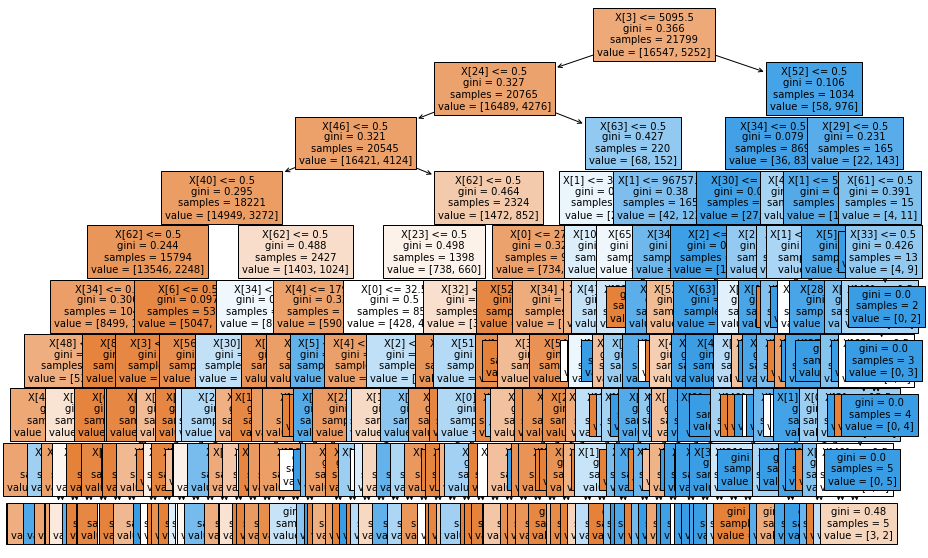

In [167]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Decision_with_bestparams,filled=True,fontsize=10)